In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import trange

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

In [2]:
def dice_frequency(n: int) -> float:
    b = np.random.randint(1, 7, size=n)
    m = (b == 3).sum()
    return m / n

100%|████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.13it/s]


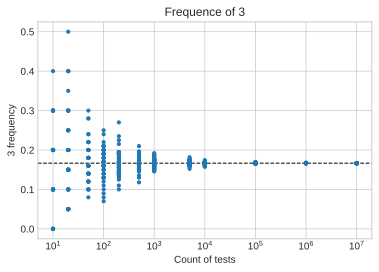

In [3]:
ns = [10, 20, 50, 100, 200, 500, 1000, 5000, 10 ** 4, 10 ** 5, 10 ** 6, 10 ** 7]

x = []
y = []

for _ in trange(50, position=0, leave=True):
    for n in ns:
        x.append(n)
        y.append(dice_frequency(n))
        
plt.scatter(x, y, s=10)
plt.axhline(y=1 / 6, c='black', ls='dashed', lw=1).set_zorder(0)
plt.xscale('log')

plt.title('Frequence of 3')
plt.xlabel('Count of tests')
plt.ylabel('3 frequency')

plt.show()

In [4]:
def combinations(n: int, m: int) -> int:
    return np.math.factorial(n) // (np.math.factorial(m) * np.math.factorial(n - m))

def arrangements(n: int, m: int) -> int:
    return np.math.factorial(n) //  np.math.factorial(n - m)

def permutations(n: int) -> int:
    return np.math.factorial(n)

## _Ex. 1_

#### Имеется колода в 52 карты. Найти число возможностей вытянуть из неё 4 карты так, чтобы среди них был хотя бы один туз.

In [5]:
combinations(52, 4) - combinations(48, 4)

76145

## _Ex. 2_

#### Из 60 вопросов, входящих в экзаменационные билеты, студент знает 50. Случайным образом студент вытягивает 3 вопроса. Какова вероятность, что все выбранные вопросы знакомы студенту? 

In [6]:
5/6 * 49/59 * 48/58

0.5727644652250147

In [7]:
combinations(50, 3) / combinations(60, 3)

0.5727644652250146

## _Ex. 3_

#### Из 60 вопросов, входящих в экзаменационные билеты, студент знает 50. Случайным образом студент вытягивает 3 вопроса. Какова вероятность что два из трёх вопросов знакомы студенту?

In [8]:
(5/6 * 49/59 * 10/58) + (5/6 * 10/59 * 49/58) + (1/6 * 50/59 * 49/58)

0.3579777907656341

In [9]:
combinations(50, 2) * combinations(10, 1) / combinations(60, 3)

0.35797779076563413

## _Ex. 4_

#### Допустим, имеется некоторая очень редкая болезнь (поражает 0.1% населения). Вы приходите к врачу, вам делают тест на эту болезнь, и тест оказывается положительным. Врач говорит вам, что этот тест верно выявляет 99% больных этой болезнью и всего лишь в 1% случаев даёт ложный положительный ответ.

#### Вопрос: какова вероятность, что вы действительно больны ей?

A - тест положительный

B - человек болен

### $$P(B|A) = \frac{P(A|B) \cdot P(B)}{P(A)}$$
, где P(A) - полная вероятность, где A и B - произвольные вероятности, следовательно

### $$P(B|A) = \frac{P(A|B) \cdot P(B)}{P(A|B) \cdot P(B) + P(A|\neg B) \cdot P(\neg B)}$$

In [10]:
P_ba = (99/100 * 1/1000) / (99/100 * 1/1000 + 99/100 * 999/1000)
P_ba

0.001